# **Built-in functions**

## **Download and install Spark**

In [1]:
!ls

sample_data


In [4]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-2.3.1/spark-2.3.1-bin-hadoop2.7.tgz
!tar xf spark-2.3.1-bin-hadoop2.7.tgz
!pip install -q findspark

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [49.8 kB]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:13 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:14 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Package

## **Setup environment**

In [5]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.3.1-bin-hadoop2.7"

import findspark
findspark.init()
from pyspark import SparkContext
sc = SparkContext.getOrCreate()

import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate() 
spark

## **Downloading and preprocessing Chicago's Reported Crime Data**

In [6]:
!wget https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
!ls -l

--2021-03-30 15:18:41--  https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.68.26, 52.206.140.199, 52.206.140.205
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [ <=>                ]   1.60G  2.36MB/s    in 31m 55s 

2021-03-30 15:50:37 (878 KB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [1722223627]

total 1902464
-rw-r--r--  1 root root 1722223627 Mar 30 11:05 'rows.csv?accessType=DOWNLOAD'
drwxr-xr-x  1 root root       4096 Mar 18 13:36  sample_data
drwxrwxr-x 13 1000 1000       4096 Jun  1  2018  spark-2.3.1-bin-hadoop2.7
-rw-r--r--  1 root root  225883783 Jun  1  2018  spark-2.3.1-bin-hadoop2.7.tgz


In [8]:
!mv rows.csv\?accessType\=DOWNLOAD reported-crimes.csv
!ls -l

total 3584328
-rw-r--r--  1 root root 1722223627 Mar 30 11:05  reported-crimes.csv
-rw-r--r--  1 root root 1722223627 Mar 30 11:05 'rows.csv?accessType=DOWNLOAD.1'
drwxr-xr-x  1 root root       4096 Mar 18 13:36  sample_data
drwxrwxr-x 13 1000 1000       4096 Jun  1  2018  spark-2.3.1-bin-hadoop2.7
-rw-r--r--  1 root root  225883783 Jun  1  2018  spark-2.3.1-bin-hadoop2.7.tgz


In [36]:
from pyspark.sql.functions import to_timestamp,col,lit
rc = spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') < lit('2018-11-12'))
rc.show(5)

+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     00

## **Built-in functions**

In [32]:
from pyspark.sql import functions

In [33]:
# Let's see the different functions list we have
print(dir(functions))

['AutoBatchedSerializer', 'Column', 'DataFrame', 'DataType', 'PandasUDFType', 'PickleSerializer', 'PythonEvalType', 'SparkContext', 'StringType', 'UserDefinedFunction', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_binary_mathfunctions', '_collect_list_doc', '_collect_set_doc', '_create_binary_mathfunction', '_create_function', '_create_udf', '_create_window_function', '_functions', '_functions_1_4', '_functions_1_6', '_functions_2_1', '_functions_deprecated', '_lit_doc', '_message', '_string_functions', '_test', '_to_java_column', '_to_seq', '_window_functions', '_wrap_deprecated_function', 'abs', 'acos', 'add_months', 'approxCountDistinct', 'approx_count_distinct', 'array', 'array_contains', 'asc', 'ascii', 'asin', 'atan', 'atan2', 'avg', 'base64', 'bin', 'bitwiseNOT', 'blacklist', 'broadcast', 'bround', 'cbrt', 'ceil', 'coalesce', 'col', 'collect_list', 'collect_set', 'column', 'concat', 'concat_ws', 'conv', 'c

## **String functions**

**Display the Primary Type column in lower and upper characters, and the first 4 characters of the column**

In [37]:
# let's import the required functions which we think be needed

from pyspark.sql.functions import lower, upper, substring

In [13]:
# Now if you dnt know the syntax of any functions you can use help
help(substring)

Help on function substring in module pyspark.sql.functions:

substring(str, pos, len)
    Substring starts at `pos` and is of length `len` when str is String type or
    returns the slice of byte array that starts at `pos` in byte and is of length `len`
    when str is Binary type.
    
    .. note:: The position is not zero based, but 1 based index.
    
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(substring(df.s, 1, 2).alias('s')).collect()
    [Row(s='ab')]
    
    .. versionadded:: 1.5



In [14]:
# Now we see the index starts from 1 not zero
# Also let's confirm the type for the Primary column and check if it's string so that substring works okk

rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [20]:
# So as confirmed let's get the lower ,upper and first 4 characters from Primary column
rc.select(lower(col('Primary Type')),upper(col('Primary Type')),substring(col('Primary Type'),1,4)).show(5)

+-------------------+-------------------+-----------------------------+
|lower(Primary Type)|upper(Primary Type)|substring(Primary Type, 1, 4)|
+-------------------+-------------------+-----------------------------+
|            battery|            BATTERY|                         BATT|
|              theft|              THEFT|                         THEF|
|              theft|              THEFT|                         THEF|
|          narcotics|          NARCOTICS|                         NARC|
|            assault|            ASSAULT|                         ASSA|
+-------------------+-------------------+-----------------------------+
only showing top 5 rows



## **Numeric functions**


**Show the oldest date and the most recent date**

In [38]:
# So to do this we may need min and max where min=oldest date and max=most recent date
from pyspark.sql.functions import min,max

In [22]:
# now let's get the oldest and most recent date
rc.select(min(col('Date')),max(col('Date'))).show(1)

+-------------------+-------------------+
|          min(Date)|          max(Date)|
+-------------------+-------------------+
|2001-01-01 00:00:00|2018-11-11 23:50:00|
+-------------------+-------------------+



##**Date**

**What is 3 days earlier that the oldest date and 3 days later than the most recent date?**

In [39]:
# So to see 3 days earlier we may want something like date_sub and then for 3 days later we may need something like date_add
# Let's import both

from pyspark.sql.functions import date_add,date_sub

In [24]:
# let's use help to understand the syntax
help(date_add)  

Help on function date_add in module pyspark.sql.functions:

date_add(start, days)
    Returns the date that is `days` days after `start`
    
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(date_add(df.dt, 1).alias('next_date')).collect()
    [Row(next_date=datetime.date(2015, 4, 9))]
    
    .. versionadded:: 1.5



In [30]:
# Let's find the 3 days earlier and later dates

rc.select(date_sub(min(col('Date')),3),date_add(max(col('Date')),3)).show(1)

+----------------------+----------------------+
|date_sub(min(Date), 3)|date_add(max(Date), 3)|
+----------------------+----------------------+
|            2000-12-29|            2018-11-14|
+----------------------+----------------------+



## **Working With Dates and Timestamps**

**Use the following link to explore the different patterns used for SimpleDateFormat java**

[DateFormat](https://docs.oracle.com/javase/8/docs/api/java/text/SimpleDateFormat.html)

In [40]:
from pyspark.sql.functions import to_date, to_timestamp, lit

**Date1 = 2019-12-25 13:30:00** 

In [36]:
# Now let's create a sample df with above date format
df = spark.createDataFrame([('2019-12-25 13:30:00',)],['Christmas'])
df.show()

+-------------------+
|          Christmas|
+-------------------+
|2019-12-25 13:30:00|
+-------------------+



In [38]:
help(to_date)

Help on function to_date in module pyspark.sql.functions:

to_date(col, format=None)
    Converts a :class:`Column` of :class:`pyspark.sql.types.StringType` or
    :class:`pyspark.sql.types.TimestampType` into :class:`pyspark.sql.types.DateType`
    using the optionally specified format. Specify formats according to
    `SimpleDateFormats <http://docs.oracle.com/javase/tutorial/i18n/format/simpleDateFormat.html>`_.
    By default, it follows casting rules to :class:`pyspark.sql.types.DateType` if the format
    is omitted (equivalent to ``col.cast("date")``).
    
    >>> df = spark.createDataFrame([('1997-02-28 10:30:00',)], ['t'])
    >>> df.select(to_date(df.t).alias('date')).collect()
    [Row(date=datetime.date(1997, 2, 28))]
    
    >>> df = spark.createDataFrame([('1997-02-28 10:30:00',)], ['t'])
    >>> df.select(to_date(df.t, 'yyyy-MM-dd HH:mm:ss').alias('date')).collect()
    [Row(date=datetime.date(1997, 2, 28))]
    
    .. versionadded:: 2.2



In [39]:
help(to_timestamp)

Help on function to_timestamp in module pyspark.sql.functions:

to_timestamp(col, format=None)
    Converts a :class:`Column` of :class:`pyspark.sql.types.StringType` or
    :class:`pyspark.sql.types.TimestampType` into :class:`pyspark.sql.types.DateType`
    using the optionally specified format. Specify formats according to
    `SimpleDateFormats <http://docs.oracle.com/javase/tutorial/i18n/format/simpleDateFormat.html>`_.
    By default, it follows casting rules to :class:`pyspark.sql.types.TimestampType` if the format
    is omitted (equivalent to ``col.cast("timestamp")``).
    
    >>> df = spark.createDataFrame([('1997-02-28 10:30:00',)], ['t'])
    >>> df.select(to_timestamp(df.t).alias('dt')).collect()
    [Row(dt=datetime.datetime(1997, 2, 28, 10, 30))]
    
    >>> df = spark.createDataFrame([('1997-02-28 10:30:00',)], ['t'])
    >>> df.select(to_timestamp(df.t, 'yyyy-MM-dd HH:mm:ss').alias('dt')).collect()
    [Row(dt=datetime.datetime(1997, 2, 28, 10, 30))]
    
    .. ver

In [37]:
df.select(to_date(col('Christmas'),'yyyy-mm-dd HH:mm:ss'), to_timestamp(col('Christmas'),'yyyy-mm-dd HH:mm:ss')).show()


+-------------------------------------------+------------------------------------------------+
|to_date(`Christmas`, 'yyyy-mm-dd HH:mm:ss')|to_timestamp(`Christmas`, 'yyyy-mm-dd HH:mm:ss')|
+-------------------------------------------+------------------------------------------------+
|                                 2019-01-25|                             2019-01-25 13:30:00|
+-------------------------------------------+------------------------------------------------+



**Date2 = 25/Dec/2019 13:30:00**

In [44]:
df1 = spark.createDataFrame([('25/Dec/2019 13:30:00',)],['Christmas'])
df1.show(1,False)

+--------------------+
|Christmas           |
+--------------------+
|25/Dec/2019 13:30:00|
+--------------------+



In [45]:
df1.select(to_date(col('Christmas'),'dd/MMM/yyyy HH:mm:ss'),to_timestamp(col('Christmas'),'dd/MMM/yyyy HH:mm:ss')).show(1)

+--------------------------------------------+-------------------------------------------------+
|to_date(`Christmas`, 'dd/MMM/yyyy HH:mm:ss')|to_timestamp(`Christmas`, 'dd/MMM/yyyy HH:mm:ss')|
+--------------------------------------------+-------------------------------------------------+
|                                  2019-12-25|                              2019-12-25 13:30:00|
+--------------------------------------------+-------------------------------------------------+



**Date3= 12/25/2019 01:30:00 PM**

In [46]:
df2 = spark.createDataFrame([('12/25/2019 01:30:00 PM',)],['Christmas'])
df2.show(1,False)

+----------------------+
|Christmas             |
+----------------------+
|12/25/2019 01:30:00 PM|
+----------------------+



In [48]:
df2.select(to_date(col('Christmas'),'MM/dd/yyyy hh:mm:ss aa'),to_timestamp(col('Christmas'),'MM/dd/yyyy hh:mm:ss aa')).show(1)

+----------------------------------------------+---------------------------------------------------+
|to_date(`Christmas`, 'MM/dd/yyyy hh:mm:ss aa')|to_timestamp(`Christmas`, 'MM/dd/yyyy hh:mm:ss aa')|
+----------------------------------------------+---------------------------------------------------+
|                                    2019-12-25|                                2019-12-25 13:30:00|
+----------------------------------------------+---------------------------------------------------+



In [50]:
!ls

reported-crimes.csv  spark-2.3.1-bin-hadoop2.7	    spark-warehouse
sample_data	     spark-2.3.1-bin-hadoop2.7.tgz


In [51]:
# let's check our chicago dataset
nrc = spark.read.csv('reported-crimes.csv',header=True)
nrc.show(5,False)

+--------+-----------+----------------------+---------------------+----+------------+-----------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+------------+-------------+-----------------------------+
|ID      |Case Number|Date                  |Block                |IUCR|Primary Type|Description            |Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On            |Latitude    |Longitude    |Location                     |
+--------+-----------+----------------------+---------------------+----+------------+-----------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+------------+-------------+-----------------------------+
|10224738|HY411648   |09/05/2015 01:30:00 PM|043XX S WOOD ST      |0486|BATTERY     |DOMESTIC BAT

**Working with Joins**

***Download police station data***

[Police data](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2)

In [18]:
!wget -O police_stations.csv https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD

--2021-03-30 16:08:11--  https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.68.26, 52.206.140.199, 52.206.140.205
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘police_stations.csv’

police_stations.csv     [ <=>                ]   5.57K  --.-KB/s    in 0s      

2021-03-30 16:08:12 (565 MB/s) - ‘police_stations.csv’ saved [5699]



In [19]:
!ls

police_stations.csv  sample_data		spark-2.3.1-bin-hadoop2.7.tgz
reported-crimes.csv  spark-2.3.1-bin-hadoop2.7	spark-warehouse


In [53]:
# Lets read the police data

ps1 = spark.read.csv('police_stations.csv',header=True)
ps1.show(5)

# Have a look at district number and District Name

+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|    DISTRICT|DISTRICT NAME|            ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|
+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|Headquarters| Headquarters|3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        null|        null|        null| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|
|          18|   Near North| 1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742-5773| 1172080.029| 1908086.527|41.90324165|-87.64335214|(41.9032416531, -

**Now the reported crimes dataset has only the district number.Add the district name by joining with the police station dataset**

In [23]:
# Let's cache the reporting crime data to speed things up
rc.cache()
rc.count()

6754775

In [54]:
# Let's get the distinct district values from police stations

ps1.select(col('DISTRICT')).distinct().show(30) 

+--------------------+
|            DISTRICT|
+--------------------+
|                   7|
|                  15|
|                  11|
|                   3|
|                   8|
|                  22|
|                  16|
|                   5|
|                  18|
|                  17|
|                   6|
|                  19|
|                  25|
|        Headquarters|
|                  24|
|                   9|
|                   1|
|                  20|
|                  10|
|                   4|
|                  12|
|                  14|
|                   2|
|",Chicago,IL,6060...|
+--------------------+



In [24]:
# Let's get the same for reported crimes 

rc.select(col('District')).distinct().show(30)

# Now one concern the rc data district column has leading zeros but not in ps data

+--------+
|District|
+--------+
|     009|
|     012|
|     024|
|    null|
|     031|
|     015|
|     006|
|     019|
|     020|
|     011|
|     025|
|     005|
|     003|
|     016|
|     018|
|     008|
|     022|
|     001|
|     014|
|     010|
|     004|
|     017|
|     007|
|     021|
|     002|
+--------+



In [49]:
# Now lets use padding to do some manipulation

from pyspark.sql.functions import lpad

In [50]:
# Let's check the syntax 
help(lpad)

Help on function lpad in module pyspark.sql.functions:

lpad(col, len, pad)
    Left-pad the string column to width `len` with `pad`.
    
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(lpad(df.s, 6, '#').alias('s')).collect()
    [Row(s='##abcd')]
    
    .. versionadded:: 1.5



In [55]:
ps1.select(lpad(col('DISTRICT'),3,'0')).show(5)

+--------------------+
|lpad(DISTRICT, 3, 0)|
+--------------------+
|                 Hea|
|                 018|
|                 019|
|                 020|
|                 022|
+--------------------+
only showing top 5 rows



In [56]:
# Let's create new column with above format
ps2 = ps1.withColumn('Format_district',lpad(col('DISTRICT'),3,'0'))

In [57]:
ps2.show(5)

+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|    DISTRICT|DISTRICT NAME|            ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|Format_district|
+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|Headquarters| Headquarters|3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        null|        null|        null| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|            Hea|
|          18|   Near North| 1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742-5773| 117

In [61]:
 # Doing left outer join

rc.join(ps2, rc.District == ps2.Format_district,'left_outer').show()

+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+--------+--------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|      ID|Case Number|               Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|DISTRICT| DISTRICT NAME|             ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|Format_distri

In [63]:
ps2.columns

['DISTRICT',
 'DISTRICT NAME',
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'Format_district']

In [67]:
# let's drop some columns which are not needed

rc.join(ps2, rc.District == ps2.Format_district,'left_outer').drop(
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'Format_district').show(5)

+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+-------------+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|Year|          Updated On|DISTRICT|DISTRICT NAME|
+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+-------------+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     009|  12|            61|     08B|2015|02/10/2018 03:50:...|       9|      Deering|
|10224739|   HY411615|2015-09-04 11:30:00| 008XX N CENTRAL AVE|0870|    

**Challenge**

1. *Find the most frequently reported noncriminal activity*
2. *Find the day of the week with the most reported crime*

In [68]:
# Challenge 1 
# Let's first get the count distinct types of activity
rc.select(col('Primary Type')).distinct().count()

36

In [71]:
#Let's display the types names
rc.select(col('Primary Type')).distinct().orderBy('Primary Type').show(36,False)

# we see 3 different types of NON-CRIMINAL 

+---------------------------------+
|Primary Type                     |
+---------------------------------+
|ARSON                            |
|ASSAULT                          |
|BATTERY                          |
|BURGLARY                         |
|CONCEALED CARRY LICENSE VIOLATION|
|CRIM SEXUAL ASSAULT              |
|CRIMINAL DAMAGE                  |
|CRIMINAL SEXUAL ASSAULT          |
|CRIMINAL TRESPASS                |
|DECEPTIVE PRACTICE               |
|DOMESTIC VIOLENCE                |
|GAMBLING                         |
|HOMICIDE                         |
|HUMAN TRAFFICKING                |
|INTERFERENCE WITH PUBLIC OFFICER |
|INTIMIDATION                     |
|KIDNAPPING                       |
|LIQUOR LAW VIOLATION             |
|MOTOR VEHICLE THEFT              |
|NARCOTICS                        |
|NON - CRIMINAL                   |
|NON-CRIMINAL                     |
|NON-CRIMINAL (SUBJECT SPECIFIED) |
|OBSCENITY                        |
|OFFENSE INVOLVING CHILDREN 

In [72]:
# Let's filter the 3 provided  and store them in new Dataframe 
nc = rc.filter((col('Primary Type') == 'NON - CRIMINAL') | (col('Primary Type') == 'NON-CRIMINAL') | (col('Primary Type') == 'NON-CRIMINAL (SUBJECT SPECIFIED)'))
nc.show(50)

+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10233370|   HY421530|2015-09-13 10:45:00|  010XX S MENARD AVE|5114|      NON - CRIMINAL|   FOID - REVOCATION|           RESIDE

In [74]:
#Lets group with description and order by count descending to get the frequently reported noncriminal activity
nc.groupBy(col('Description')).count().orderBy('count',ascending=False).show(truncate=False)

+-------------------------------------------+-----+
|Description                                |count|
+-------------------------------------------+-----+
|LOST PASSPORT                              |107  |
|FOID - REVOCATION                          |75   |
|NOTIFICATION OF CIVIL NO CONTACT ORDER     |9    |
|NOTIFICATION OF STALKING - NO CONTACT ORDER|8    |
|CONCEALED CARRY LICENSE REVOCATION         |4    |
|FOUND PASSPORT                             |4    |
|GUN OFFENDER NOTIFICATION-NO CONTACT       |3    |
+-------------------------------------------+-----+



In [75]:
# Challenge 2
# day of the week with the most reported crime

from pyspark.sql.functions import dayofweek

In [76]:
help(dayofweek)

Help on function dayofweek in module pyspark.sql.functions:

dayofweek(col)
    Extract the day of the week of a given date as integer.
    
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(dayofweek('dt').alias('day')).collect()
    [Row(day=4)]
    
    .. versionadded:: 2.3



In [77]:
rc.show(5)

+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     00

In [78]:
# let's isolate day of week in different column
rc.select(col('Date'),dayofweek(col('Date'))).show(5)

+-------------------+---------------+
|               Date|dayofweek(Date)|
+-------------------+---------------+
|2015-09-05 13:30:00|              7|
|2015-09-04 11:30:00|              6|
|2018-09-01 00:01:00|              7|
|2015-09-05 12:45:00|              7|
|2015-09-05 13:00:00|              7|
+-------------------+---------------+
only showing top 5 rows



In [95]:
# It will be good if we get the dayofweek in words rather than number so let's use date_format
from pyspark.sql.functions import date_format

In [80]:
help(date_format)

Help on function date_format in module pyspark.sql.functions:

date_format(date, format)
    Converts a date/timestamp/string to a value of string in the format specified by the date
    format given by the second argument.
    
    A pattern could be for instance `dd.MM.yyyy` and could return a string like '18.03.1993'. All
    pattern letters of the Java class `java.text.SimpleDateFormat` can be used.
    
    .. note:: Use when ever possible specialized functions like `year`. These benefit from a
        specialized implementation.
    
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(date_format('dt', 'MM/dd/yyy').alias('date')).collect()
    [Row(date='04/08/2015')]
    
    .. versionadded:: 1.5



In [81]:
# to get day of week in words we use E pattern from simpledateformat
rc.select(col('Date'),dayofweek(col('Date')),date_format(col('Date'),'E')).show(5)

+-------------------+---------------+--------------------+
|               Date|dayofweek(Date)|date_format(Date, E)|
+-------------------+---------------+--------------------+
|2015-09-05 13:30:00|              7|                 Sat|
|2015-09-04 11:30:00|              6|                 Fri|
|2018-09-01 00:01:00|              7|                 Sat|
|2015-09-05 12:45:00|              7|                 Sat|
|2015-09-05 13:00:00|              7|                 Sat|
+-------------------+---------------+--------------------+
only showing top 5 rows



In [82]:
# Let's group on day of week and get the count in descending order to see the most frequent results 
rc.groupBy(date_format(col('Date'),'E')).count().orderBy('count',ascending=False).show()

+--------------------+-------+
|date_format(Date, E)|  count|
+--------------------+-------+
|                 Fri|1017096|
|                 Wed| 974005|
|                 Tue| 968154|
|                 Sat| 965282|
|                 Thu| 964676|
|                 Mon| 952851|
|                 Sun| 912711|
+--------------------+-------+



In [83]:
# How about we plot it crimes count vs day of week??

# To do that let's collect the respective day and its count data
rc.groupBy(date_format(col('Date'),'E')).count().collect()

[Row(date_format(Date, E)='Sun', count=912711),
 Row(date_format(Date, E)='Mon', count=952851),
 Row(date_format(Date, E)='Thu', count=964676),
 Row(date_format(Date, E)='Sat', count=965282),
 Row(date_format(Date, E)='Wed', count=974005),
 Row(date_format(Date, E)='Fri', count=1017096),
 Row(date_format(Date, E)='Tue', count=968154)]

In [84]:
#using list comprehension to get individual data in variables list
dow = [x[0] for x in rc.groupBy(date_format(col('Date'),'E')).count().collect()]
dow

['Sun', 'Mon', 'Thu', 'Sat', 'Wed', 'Fri', 'Tue']

In [86]:
cnt = [x[1] for x in rc.groupBy(date_format(col('Date'),'E')).count().collect()]
cnt

[912711, 952851, 964676, 965282, 974005, 1017096, 968154]

In [87]:
# let's import pandas and pyplot for plotting the data
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
#create the dataframe using dictionary
cp = pd.DataFrame({'Day_of_week' : dow, 'Count': cnt})
cp.head(7)

,Day_of_week,Count
0,Sun,912711
1,Mon,952851
2,Thu,964676
3,Sat,965282
4,Wed,974005
5,Fri,1017096
6,Tue,968154


Text(0, 0.5, 'No. of reported crimes')

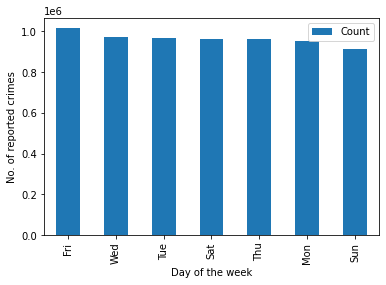

In [94]:
# Now plot the date using day_of_week and count
cp.sort_values('Count',ascending=False).plot(kind='bar',x='Day_of_week',y='Count')
plt.xlabel('Day of the week')
plt.ylabel('No. of reported crimes')
#plt.title('Crimes Reported per day of week from 2001 -Present')

## **Working with RDDs**

In [97]:
!ls

police_stations.csv  sample_data		spark-2.3.1-bin-hadoop2.7.tgz
reported-crimes.csv  spark-2.3.1-bin-hadoop2.7	spark-warehouse


**RDDs Setup**

In [100]:
# let's read police station data in Rdd

psrdd = sc.textFile('police_stations.csv')
psrdd.first()

'DISTRICT,DISTRICT NAME,ADDRESS,CITY,STATE,ZIP,WEBSITE,PHONE,FAX,TTY,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION'

In [108]:
# let's get the header 
ps_header = psrdd.first()

In [109]:
# let's remove the header
ps_rest = psrdd.filter(lambda line : line!= ps_header)
ps_rest.first()

'Headquarters,Headquarters,3510 S Michigan Ave,Chicago,IL,60653,http://home.chicagopolice.org,,,,1177731.401,1881697.404,41.83070169,-87.62339535,"(41.8307016873, -87.6233953459)"'

In [110]:
# How many police stations are there?

ps_rest.map(lambda line : line.split(',')).collect()

#split as its csv file and can view all of them using collect so each block represents row

[['Headquarters',
  'Headquarters',
  '3510 S Michigan Ave',
  'Chicago',
  'IL',
  '60653',
  'http://home.chicagopolice.org',
  '',
  '',
  '',
  '1177731.401',
  '1881697.404',
  '41.83070169',
  '-87.62339535',
  '"(41.8307016873',
  ' -87.6233953459)"'],
 ['18',
  'Near North',
  '1160 N Larrabee St',
  'Chicago',
  'IL',
  '60610',
  'http://home.chicagopolice.org/community/districts/18th-district-near-north/',
  '312-742-5870',
  '312-742-5771',
  '312-742-5773',
  '1172080.029',
  '1908086.527',
  '41.90324165',
  '-87.64335214',
  '"(41.9032416531',
  ' -87.6433521393)"'],
 ['19',
  'Town Hall',
  '850 W Addison St',
  'Chicago',
  'IL',
  '60613',
  'http://home.chicagopolice.org/community/districts/19th-district-town-hall/',
  '312-744-8320',
  '312-744-4481',
  '312-744-8011',
  '1169730.744',
  '1924160.317',
  '41.94740046',
  '-87.65151202',
  '"(41.9474004564',
  ' -87.651512018)"'],
 ['20',
  'Lincoln',
  '5400 N Lincoln Ave',
  'Chicago',
  'IL',
  '60625',
  'http://

In [111]:
# Now to get the count let's use count instead of collect
ps_rest.map(lambda line : line.split(',')).count()

24

***Display the District ID, District name, Address and Zip for the police station with District Id?***

In [112]:
#let's filter column 1 where value is 7 using filter and then display only 2,3,6 column values by using map
(ps_rest.filter(lambda line : line.split(',')[0] == '7').
 map(lambda line : (line.split(',')[0],
                    line.split(',')[1],
                    line.split(',')[2],
                    line.split(',')[5])).collect())

[('7', 'Englewood', '1438 W 63rd St', '60636')]

***Police station 10 and 11 are geographically close to each other.
Display the District ID, District name, address and zip code***

In [115]:
#let's filter column 1 where value is 10 and 11 using filter and then display only 2,3,6 column values by using map
(ps_rest.filter(lambda line : line.split(',')[0] in ['10','11']).
 map(lambda line : (line.split(',')[1],
     line.split(',')[2],
     line.split(',')[5])).collect())

[('Ogden', '3315 W Ogden Ave', '60623'),
 ('Harrison', '3151 W Harrison St', '60612')]

**Thank you all!!**

***Hope you all liked this Lab session 2***

*Reach out to me below for any issues and concerns*

[linkedin](https://www.linkedin.com/in/chinmoy07-an)